# PCA & LDA on MNIST

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
import pandas as pd


## 1. Train KNN on MNIST Dataset

In [4]:
train_data = datasets.MNIST(root = './data/02/',
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())
test_data = datasets.MNIST(root = './data/02/',
                            train=False,
                            download=True,
                            transform=transforms.ToTensor())
print('number of training data : ', len(train_data))
print('number of test data : ', len(test_data))

100%|██████████| 9912422/9912422 [00:00<00:00, 101043620.55it/s]


Extracting ./data/02/MNIST/raw/train-images-idx3-ubyte.gz to ./data/02/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 29344887.07it/s]


Extracting ./data/02/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/02/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30734699.72it/s]


Extracting ./data/02/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/02/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5474289.88it/s]

Extracting ./data/02/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/02/MNIST/raw



number of training data :  60000
number of test data :  10000


In [5]:
# 데이터 모양 확인을 위해 dataframe 형태로 변환

feat_cols = ['pixel'+str(i) for i in range(784)]
df_train = pd.DataFrame(train_data.data.reshape(60000,-1).numpy(), columns = feat_cols)
df_test = pd.DataFrame(test_data.data.reshape(10000,-1).numpy(), columns = feat_cols)

df_train.shape, df_test.shape

((60000, 784), (10000, 784))

In [6]:
df_train.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 640x480 with 0 Axes>

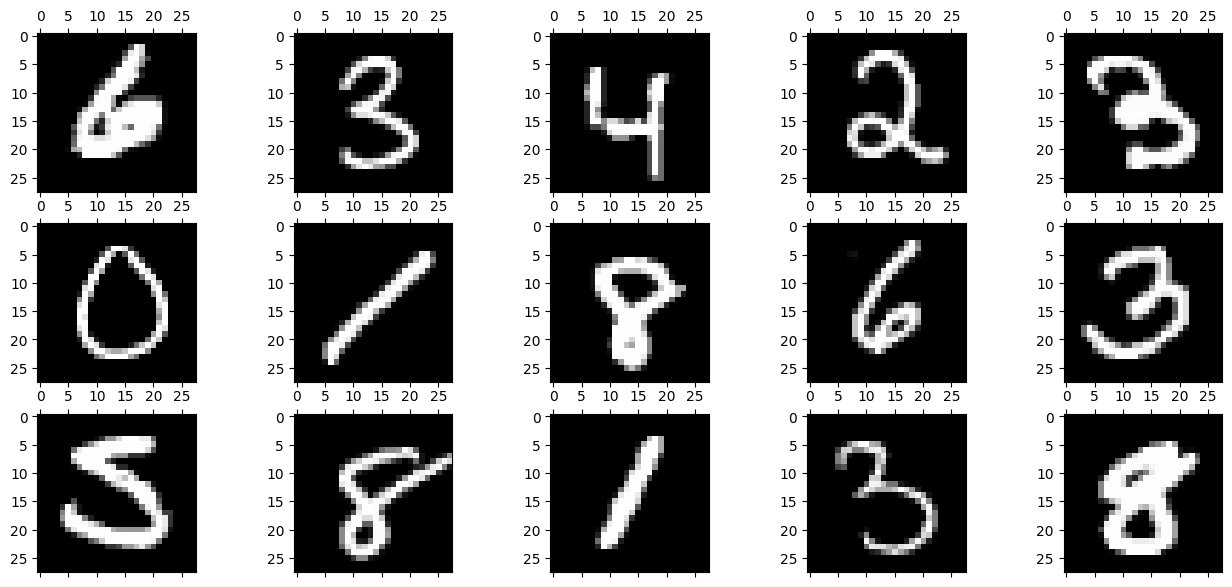

In [8]:
# 데이터 형태 시각화
import numpy as np
import matplotlib.pyplot as plt

rndperm = np.random.permutation(df_train.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1)
    ax.matshow(df_train.loc[rndperm[i], feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [9]:
# 학습 데이터 준비

import numpy as np

X_train = train_data.data.reshape(60000,-1).numpy()
y_train = train_data.targets.numpy()

X_test = test_data.data.reshape(10000,-1).numpy()
y_test = test_data.targets.numpy()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [10]:
# KNN 학습 - Baseline

from sklearn.neighbors import KNeighborsClassifier
import time

start_time = time.time()
clf = KNeighborsClassifier(n_neighbors= 5)
clf.fit(X_train, y_train)
print('Fit time : ', time.time() - start_time)

Fit time :  0.01580214500427246


In [11]:
from sklearn.metrics import accuracy_score

start_time = time.time()
pred = clf.predict(X_test)
print('Fit time : ', time.time() - start_time)
print(accuracy_score(y_test, pred))

Fit time :  56.03207778930664
0.9688


## 2. PCA & LDA 적용하기

In [13]:
# PCA 적용

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf_pca = KNeighborsClassifier(n_neighbors= 5)
clf_pca.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [14]:
# LDA 적용

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train,y_train)

In [15]:
X_train_lda.shape

(60000, 2)

In [16]:
lda.explained_variance_ratio_

array([0.2392286 , 0.20180995])

## 3. 결과 비교하기

In [17]:
# PCA 결과
start_time = time.time()
pred = clf_pca.predict(X_test_pca)
print('Fit time : ', time.time() - start_time)
print(accuracy_score(y_test, pred))

Fit time :  0.6282577514648438
0.4243


In [18]:
# LDA 결과
start_time = time.time()
y_pred = lda.predict(X_test)
print('Fit time : ', time.time() - start_time)
print(accuracy_score(y_test, y_pred))

Fit time :  0.05791926383972168
0.873


## 4. PCA & LDA 장단점 정리하기

####장단점을 자유롭게 적어주세요!

- PCA:
  - 장점:
    - PCA는 라벨이 없는 데이터에 대해서도 적용이 가능하므로, 비지도 학습 알고리즘이라고 할 수 있습니다.
    - PCA는 데이터의 분산을 최대한 보존하면서 차원을 축소하므로, 데이터의 정보 손실을 최소화합니다.
    - PCA는 고차원 데이터의 시각화에 유용합니다.
  - 단점:
    - PCA는 클래스 라벨을 고려하지 않으므로, 클래스 간의 분리를 최적화하지는 않습니다.
    - PCA는 선형적인 구조만을 고려하므로, 비선형적인 데이터 구조에는 효과적이지 않을 수 있습니다.
- LDA:
  - 장점:
    - LDA는 클래스 라벨을 고려하여 클래스 간의 분산을 최대화하고, 클래스 내의 분산을 최소화합니다. 따라서, LDA는 분류 문제에 유용합니다.
    - LDA는 클래스 간의 분리를 최적화하므로, PCA보다 더 좋은 분류 성능을 보일 수 있습니다.
  - 단점:
    - LDA는 지도 학습 방법이므로, 라벨이 없는 데이터에는 적용할 수 없습니다.
    - LDA는 선형적인 구조만을 고려하므로, 비선형적인 데이터 구조에는 효과적이지 않을 수 있습니다.
    - LDA는 클래스의 개수가 너무 많은 경우, 적절한 결과를 얻기 어려울 수 있습니다.